<a href="https://colab.research.google.com/github/tahaydogukan/Computer_Vision_cifar10_Dataset/blob/main/Computer_Vision_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train.max()

np.uint8(255)

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
print(y_train[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


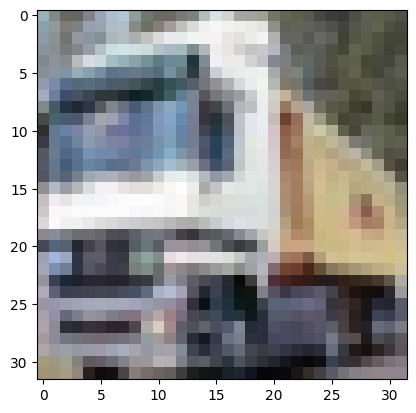

In [11]:
plt.imshow(x_train[1])
print(y_train[1])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


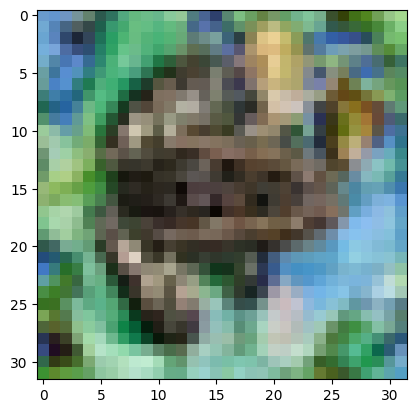

In [12]:
plt.imshow(x_train[200])
print(y_train[200])

In [19]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(10,activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [21]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2,callbacks=[early_stop])

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2644 - loss: 2.0209 - val_accuracy: 0.3347 - val_loss: 1.8105
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3798 - loss: 1.7166 - val_accuracy: 0.3946 - val_loss: 1.6900
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4144 - loss: 1.6368 - val_accuracy: 0.4205 - val_loss: 1.6195
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4339 - loss: 1.5694 - val_accuracy: 0.4257 - val_loss: 1.6112
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4626 - loss: 1.5107 - val_accuracy: 0.4480 - val_loss: 1.5498
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4706 - loss: 1.4733 - val_accuracy: 0.4627 - val_loss: 1.5205
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4819 - loss: 1.4312 - val_accuracy: 0.4776 - val_loss: 1.4827
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5019 - loss: 1.3903 - val_accuracy: 0.

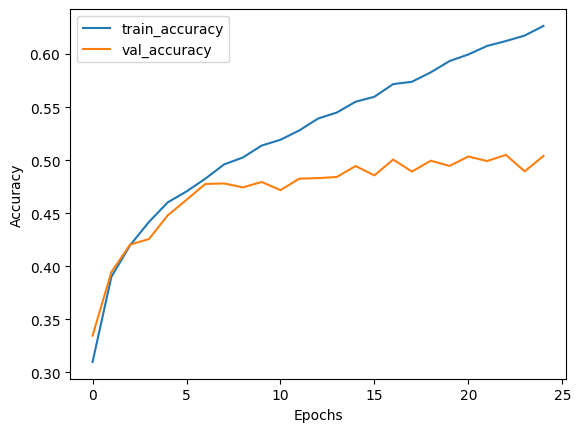

In [22]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

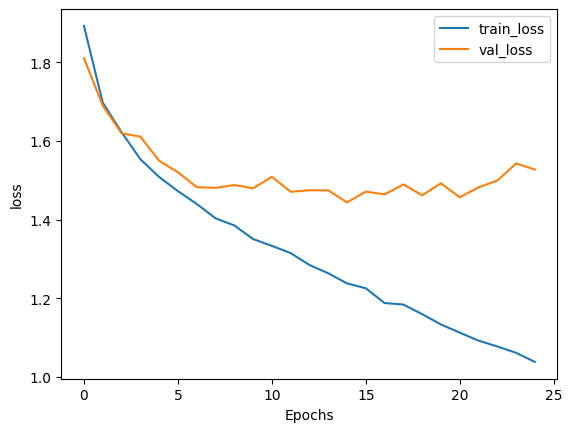

In [23]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5055 - loss: 1.5240
Test accuracy: 0.499099999666214


In [25]:
new_data = x_test[40]
new_label = y_test[40]

In [26]:
new_label

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [27]:
new_data = np.expand_dims(new_data, axis=0)

In [28]:
prediction = model.predict(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


In [29]:
predicted_label = np.argmax(prediction)
predicted_label

np.int64(4)

In [30]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 1.0, 'Gerçek Değer: 4, Tahmin: deer')

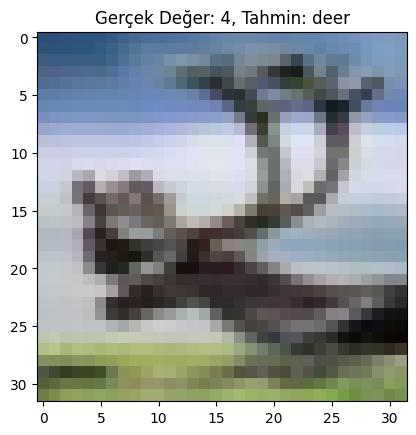

In [31]:
plt.imshow(x_test[40])
plt.title(f'Gerçek Değer: {np.argmax(new_label)}, Tahmin: {class_names[predicted_label]}')